In [1]:
#Se cargan las librerias requeridas para el modelo de regresión lineal
import matplotlib.pyplot as plt
from sklearn import linear_model # usando sklear para saber los valores optimos
import seaborn as sns
import numpy as np
import pandas as pd

# Agrega esta línea para que las gráficas se muestren en la celda de salida
%matplotlib inline


In [12]:

# Cargamos la información del CSV en una variable llamada data

data_titanic = pd.read_csv("C:/Users/rober/OneDrive/Documentos/Python proyectos/ANALISIS_DATOS/PASO2/data_regresion_lineal.csv", sep=",")


In [22]:
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [23]:
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


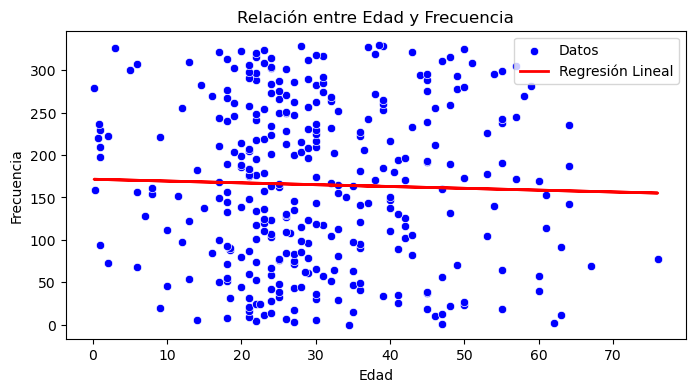

In [62]:
# Primer Análisis estadístico Histograma de edades

# Filtra los datos para eliminar las filas con valores nulos en la columna Age
data_titanic = data_titanic.dropna(subset=['Age'])

# Crear un gráfico de dispersión de las edades y la frecuencia
plt.figure(figsize=(8, 4))
sns.scatterplot(x=data_titanic['Age'], y=np.arange(len(data_titanic['Age'])), color='blue', label='Datos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Relación entre Edad y Frecuencia')

# Preparar los datos para la regresión lineal
edades = data_titanic['Age'].values.reshape(-1, 1)
frecuencia = np.arange(len(edades))

# Crear un modelo de regresión lineal
modelo = linear_model.LinearRegression()

# Ajustar el modelo de regresión lineal
modelo.fit(edades, frecuencia)

# Obtener las predicciones del modelo
predicciones = modelo.predict(edades)

# Graficar la línea de regresión lineal en el gráfico de dispersión
plt.plot(data_titanic['Age'], predicciones, color='red', linewidth=2, label='Regresión Lineal')
plt.legend()
plt.show()

C:\Users\rober\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


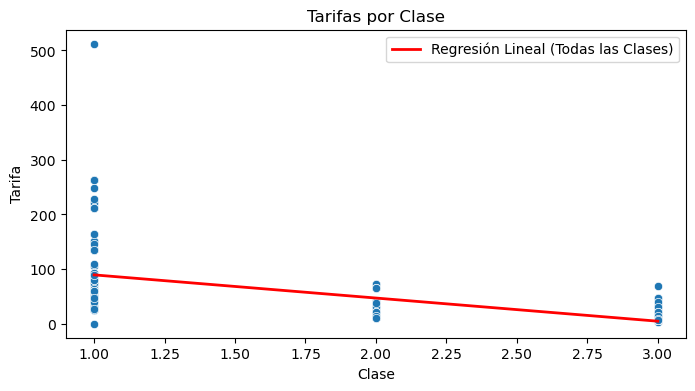

In [54]:
# Primer Análisis estadístico Boxplot de tarifas por clase
# Filtra los datos para eliminar las filas con valores nulos en las columnas Pclass y Fare

data_titanic = data_titanic.dropna(subset=['Pclass', 'Fare'])

# Crear la regresión lineal
regression = linear_model.LinearRegression()

# Variables predictoras (X) y variable objetivo (y)
X = data_titanic[['Pclass']]
y = data_titanic['Fare']

# Ajusta el modelo de regresión lineal
regression.fit(X, y)

# Visualizar los resultados en el diagrama de cajas (boxplot)
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Pclass', y='Fare', data=data_titanic)
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.title('Tarifas por Clase')

# Agregar la línea de regresión lineal para todas las clases
X_all_classes = np.array(classes).reshape(-1, 1)
plt.plot(X_all_classes, regression.predict(X_all_classes), color='red', linewidth=2, label='Regresión Lineal (Todas las Clases)')

plt.legend()
plt.show()

C:\Users\rober\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


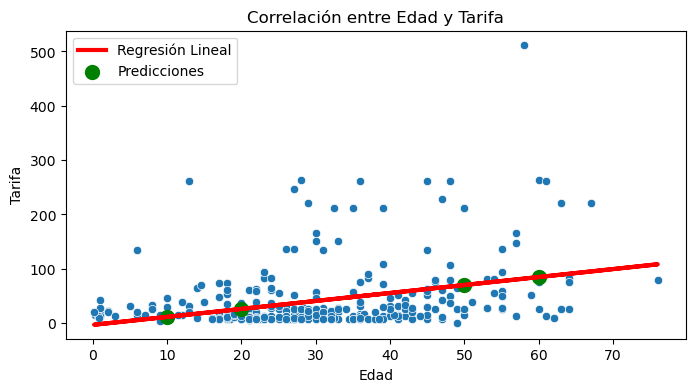

Predicción para edad 10: 11.376658490040365
Predicción para edad 20: 26.046414387939524
Predicción para edad 50: 70.055682081637
Predicción para edad 60: 84.72543797953617


In [41]:
# Tarcer Análisis estadístico Correlación entre edad y tarifa

# Filtra los datos para eliminar las filas con valores nulos en las columnas Age y Fare
data_titanic = data_titanic.dropna(subset=['Age', 'Fare'])

# Crear la regresión lineal
regression = linear_model.LinearRegression()

# Variables predictoras (X) y variable objetivo (y)
X = data_titanic[['Age']]
y = data_titanic['Fare']

# Ajusta el modelo de regresión lineal
regression.fit(X, y)

# Edades específicas para las cuales deseas hacer predicciones
edades_especificas = [10, 20, 50, 60]

# Realizar predicciones para las edades específicas
predicciones = regression.predict(np.array(edades_especificas).reshape(-1, 1))

# Visualizar los resultados en el diagrama de dispersión
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Age', y='Fare', data=data_titanic)
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Correlación entre Edad y Tarifa')

# Agregar la línea de regresión lineal
plt.plot(X, regression.predict(X), color='red', linewidth=3, label='Regresión Lineal')

# Marcar las predicciones en las edades específicas
plt.scatter(edades_especificas, predicciones, color='green', marker='o', s=100, label='Predicciones')
plt.legend()

plt.show()

# Imprimir las predicciones
for i, edad in enumerate(edades_especificas):
    print(f"Predicción para edad {edad}: {predicciones[i]}")





